In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from bootstrap_function import perform_bootstrap
from scipy.stats import ks_2samp

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

sns.set_theme()
sns.set_context("talk")

In [52]:
df = pd.read_csv('../master_df_3.csv')
df = df.drop(df.columns[0], axis=1)
df

,IMAGE_SERIES,Label,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,LONGEST_GAP,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,TRACK_DURATION,...,TRACK_MAX_SPEED,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TRACK_MAX_QUALITY,TRACK_MIN_QUALITY,TRACK_MEDIAN_QUALITY,TRACK_STD_QUALITY,cell_line
0,PRF5_B3_pickup,Track_0,0,12,0,0,0,0,0,11,...,29.000,1.000,10.000,9.781,0.093,0.123,0.059,0.100,0.017,PRF5
1,PRF5_B3_pickup,Track_1,1,10,0,0,0,0,0,9,...,2.000,0.000,1.000,0.928,0.087,0.116,0.040,0.094,0.023,PRF5
2,PRF5_B3_pickup,Track_2,2,3,0,0,0,0,0,2,...,4.000,2.000,4.000,1.414,0.067,0.075,0.056,0.070,0.008,PRF5
3,PRF5_B3_pickup,Track_3,3,7,0,0,0,0,0,6,...,12.837,2.459,6.725,3.562,0.096,0.100,0.094,0.096,0.002,PRF5
4,PRF5_B3_pickup,Track_4,4,3,0,0,0,0,0,2,...,15.758,7.837,15.758,5.601,0.075,0.080,0.071,0.073,0.004,PRF5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28951,JHH4 C2 Pickup,Track_562,171,28,1,2,0,0,0,29,...,12.144,1.261,3.776,2.951,20.357,30.860,0.938,23.666,8.401,JHH4
28952,JHH4 C2 Pickup,Track_563,172,24,1,2,0,0,0,25,...,26.095,0.513,6.390,7.976,11.447,22.958,0.681,11.079,6.412,JHH4
28953,JHH4 C2 Pickup,Track_571,180,17,0,0,0,0,0,16,...,39.380,0.910,10.010,9.622,13.101,20.086,8.683,10.978,4.414,JHH4
28954,JHH4 C2 Pickup,Track_578,187,7,0,0,0,0,0,6,...,32.209,8.133,15.220,9.544,1.150,1.464,0.510,1.325,0.317,JHH4


In [53]:
df.cell_line.unique()

array(['PRF5', 'JHH4', 'JHH6', 'JHH7', 'JHH7_2.5uM', 'JHH6_2.5uM',
       'JHH7_0uM', 'JHH6_0uM', 'JHH7_1uM', 'JHH6_1uM', 'Huh7', 'Kami41'],
      dtype=object)

In [54]:
treatment_lines = ['JHH7_2.5uM', 'JHH6_2.5uM', 'JHH7_0uM', 'JHH6_0uM', 'JHH7_1uM', 'JHH6_1uM']
treatment_lines.sort()
print(treatment_lines)
treatment_df = df[df.cell_line.isin(treatment_lines)]
treatment_df = treatment_df.sort_values('IMAGE_SERIES')
treatment_df = treatment_df.reset_index(drop=True)
treatment_df

['JHH6_0uM', 'JHH6_1uM', 'JHH6_2.5uM', 'JHH7_0uM', 'JHH7_1uM', 'JHH7_2.5uM']


,IMAGE_SERIES,Label,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,LONGEST_GAP,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,TRACK_DURATION,...,TRACK_MAX_SPEED,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TRACK_MAX_QUALITY,TRACK_MIN_QUALITY,TRACK_MEDIAN_QUALITY,TRACK_STD_QUALITY,cell_line
0,JHH6_0uM_n1,Track_683,181,56,3,1,0,0,0,58,...,28.139,0.379,6.704,6.819,0.116,0.143,0.102,0.116,0.008,JHH6_0uM
1,JHH6_0uM_n1,Track_846,344,9,0,0,0,0,0,8,...,9.577,0.832,4.246,2.843,0.118,0.132,0.107,0.117,0.008,JHH6_0uM
2,JHH6_0uM_n1,Track_845,343,3,0,0,0,0,0,2,...,7.863,4.132,7.863,2.638,0.107,0.113,0.101,0.108,0.005,JHH6_0uM
3,JHH6_0uM_n1,Track_844,342,3,0,0,0,0,0,2,...,12.000,1.000,12.000,7.778,0.111,0.115,0.107,0.110,0.003,JHH6_0uM
4,JHH6_0uM_n1,Track_843,341,6,1,1,0,0,0,6,...,7.000,1.000,5.000,2.191,0.105,0.108,0.102,0.106,0.002,JHH6_0uM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9310,JHH7_2.5uM_n4,Track_28,28,2,0,0,0,0,0,1,...,10.808,10.808,10.808,NaN,0.108,0.111,0.105,0.111,0.003,JHH7_2.5uM
9311,JHH7_2.5uM_n4,Track_29,29,2,0,0,0,0,0,1,...,11.420,11.420,11.420,NaN,0.057,0.059,0.056,0.059,0.001,JHH7_2.5uM
9312,JHH7_2.5uM_n4,Track_30,30,2,0,0,0,0,0,1,...,4.075,4.075,4.075,NaN,0.069,0.073,0.065,0.073,0.004,JHH7_2.5uM
9313,JHH7_2.5uM_n4,Track_32,32,81,0,0,0,0,0,80,...,4.163,0.172,1.077,1.085,0.072,0.075,0.068,0.073,0.002,JHH7_2.5uM


In [55]:
series_list = treatment_df.IMAGE_SERIES.unique()
series_list.sort()
series_list

array(['JHH6_0uM_n1', 'JHH6_0uM_n2', 'JHH6_0uM_n3', 'JHH6_0uM_n4',
       'JHH6_1uM_n1', 'JHH6_1uM_n2', 'JHH6_1uM_n3', 'JHH6_1uM_n4',
       'JHH6_2.5uM_n1', 'JHH6_2.5uM_n2', 'JHH6_2.5uM_n3', 'JHH6_2.5uM_n4',
       'JHH7_0uM_n1', 'JHH7_0uM_n2', 'JHH7_0uM_n3', 'JHH7_0uM_n4',
       'JHH7_1uM_n1', 'JHH7_1uM_n2', 'JHH7_1uM_n3', 'JHH7_1uM_n4',
       'JHH7_2.5uM_n1', 'JHH7_2.5uM_n2', 'JHH7_2.5uM_n3', 'JHH7_2.5uM_n4'],
      dtype=object)

In [56]:
treatment_df[treatment_df['IMAGE_SERIES'] == 'JHH6_0uM_n1']['TRACK_MEAN_SPEED'].mean()

9.968595617529882

In [57]:
# for series in series_list:
#     mean = treatment_df[treatment_df['IMAGE_SERIES'] == series]['TRACK_MEAN_SPEED'].mean()
#     mean_track_speeds.append(mean)

# # mean_track_speeds

In [58]:
# calculate mean of mean track speeds for each cell line
# create concentrations list

experiments = []
cell_lines = []
mean_track_speeds = []
concentrations = []

for series in series_list:
    experiment = series[-2:]
    experiments.append(experiment)
    
    mean = treatment_df[treatment_df['IMAGE_SERIES'] == series]['TRACK_MEAN_SPEED'].mean()
    mean_track_speeds.append(mean)
    
    cell_line = series[:4]
    cell_lines.append(cell_line)
    
    concentration = series[5]
    if concentration == '2':
        concentrations.append(2.5)
    else:
        concentrations.append(int(concentration))
        

print(experiments, cell_lines, concentrations)

['n1', 'n2', 'n3', 'n4', 'n1', 'n2', 'n3', 'n4', 'n1', 'n2', 'n3', 'n4', 'n1', 'n2', 'n3', 'n4', 'n1', 'n2', 'n3', 'n4', 'n1', 'n2', 'n3', 'n4'] ['JHH6', 'JHH6', 'JHH6', 'JHH6', 'JHH6', 'JHH6', 'JHH6', 'JHH6', 'JHH6', 'JHH6', 'JHH6', 'JHH6', 'JHH7', 'JHH7', 'JHH7', 'JHH7', 'JHH7', 'JHH7', 'JHH7', 'JHH7', 'JHH7', 'JHH7', 'JHH7', 'JHH7'] [0, 0, 0, 0, 1, 1, 1, 1, 2.5, 2.5, 2.5, 2.5, 0, 0, 0, 0, 1, 1, 1, 1, 2.5, 2.5, 2.5, 2.5]


In [59]:
lists_to_df = [cell_lines, mean_track_speeds, concentrations]

In [60]:
# create concentrations df
# concentrations_df = pd.DataFrame(lists_to_df, columns = ['cell_lines', 'mean_track_speeds', 'concentrations'])

concentrations_df = pd.DataFrame(list(zip(experiments, cell_lines, mean_track_speeds, concentrations)), 
                                 columns = ['experiment', 'cell_line', 'mean_track_speed', 'concentration'])


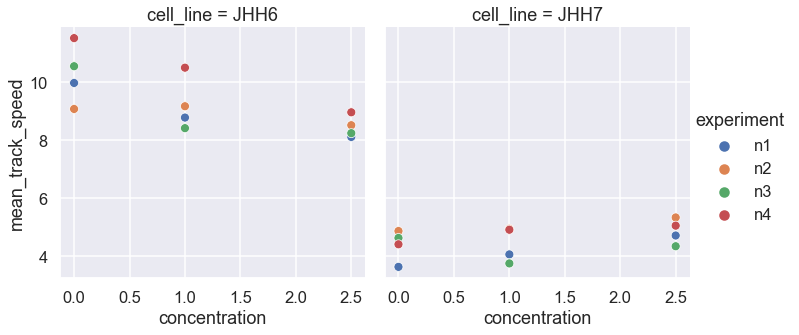

In [61]:
sns.relplot(
    data=concentrations_df, x="concentration", y="mean_track_speed", hue="experiment",
    col="cell_line", kind="scatter"
)

In [62]:
JHH6_concentrations_df = concentrations_df[concentrations_df['cell_line'] == 'JHH6']
JHH6_concentrations_df

,experiment,cell_line,mean_track_speed,concentration
0,n1,JHH6,9.968596,0.0
1,n2,JHH6,9.073734,0.0
2,n3,JHH6,10.544550,0.0
3,n4,JHH6,11.511603,0.0
4,n1,JHH6,8.778416,1.0
5,n2,JHH6,9.167653,1.0
6,n3,JHH6,8.413350,1.0
7,n4,JHH6,10.494301,1.0
8,n1,JHH6,8.111478,2.5
9,n2,JHH6,8.514949,2.5


In [63]:
# change in mean of mean values based on aggregate treatment values
zero_mean = JHH6_concentrations_df[JHH6_concentrations_df['concentration'] == 0.0]['mean_track_speed'].mean()
one_mean = JHH6_concentrations_df[JHH6_concentrations_df['concentration'] == 1.0]['mean_track_speed'].mean()
two_mean = JHH6_concentrations_df[JHH6_concentrations_df['concentration'] == 2.5]['mean_track_speed'].mean()

one_change = (zero_mean - one_mean) / zero_mean
two_change = (zero_mean - two_mean) / zero_mean
print(one_change)
print(two_change)

0.103282747470026
0.17692825639536358


[Text(0.5, 1.0, 'JHH6 Mean Track Speeds vs. Concentration of MK2206')]

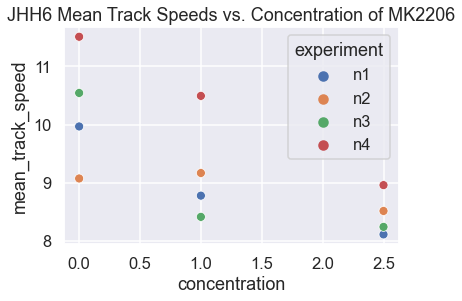

In [64]:
sns.scatterplot(data=JHH6_concentrations_df, x="concentration", y="mean_track_speed", 
                hue="experiment").set(title='JHH6 Mean Track Speeds vs. Concentration of MK2206')

<AxesSubplot:xlabel='concentration', ylabel='mean_track_speed'>

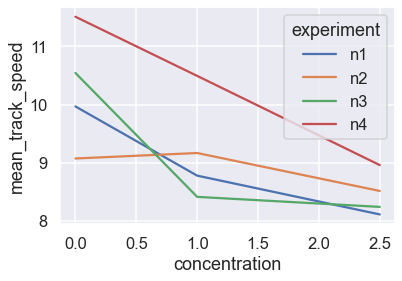

In [65]:
sns.lineplot(data=JHH6_concentrations_df, x="concentration", y="mean_track_speed", hue="experiment")

[Text(0.5, 1.0, 'JHH7 Mean Track Speeds vs. Concentration of MK2206')]

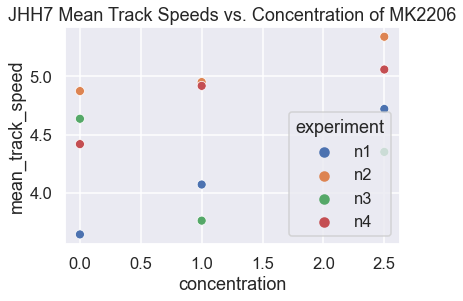

In [66]:
JHH7_concentrations_df = concentrations_df[concentrations_df['cell_line'] == 'JHH7']

sns.scatterplot(data=JHH7_concentrations_df, x="concentration", y="mean_track_speed", 
                hue="experiment").set(title='JHH7 Mean Track Speeds vs. Concentration of MK2206')

<AxesSubplot:xlabel='concentration', ylabel='mean_track_speed'>

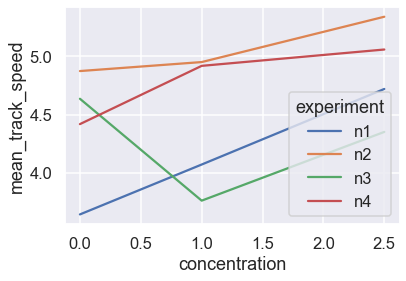

In [67]:
sns.lineplot(data=JHH7_concentrations_df, x="concentration", y="mean_track_speed", hue="experiment")

In [68]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 -0.7095671057791832
Mean squared error: 0.53
Coefficient of determination: 0.50


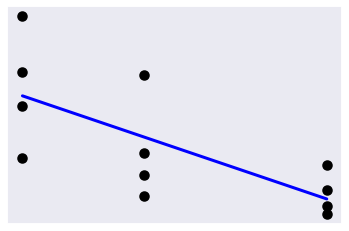

In [69]:
# run linear regression on JHH6 values

# X values are concentration
JHH6_X = JHH6_concentrations_df['concentration'].to_numpy()
JHH6_X = JHH6_X.reshape(-1, 1)
# Y is mean speed
JHH6_Y = JHH6_concentrations_df['mean_track_speed'].to_numpy()
JHH6_Y = JHH6_Y.reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(JHH6_X, JHH6_Y)

JHH6_y_pred = regr.predict(JHH6_X)

# The coefficients
coefficient = regr.coef_[0][0]
print("Coefficients: \n", coefficient)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(JHH6_Y, JHH6_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(JHH6_Y, JHH6_y_pred))

# Plot outputs
plt.scatter(JHH6_X, JHH6_Y, color="black")
plt.plot(JHH6_X, JHH6_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [79]:
import statsmodels.api as sma

In [91]:
X2 = sma.add_constant(JHH6_X)

model = sma.OLS(JHH6_Y, X2)
result = model.fit()
summary = result.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     10.08
Date:                Thu, 10 Feb 2022   Prob (F-statistic):            0.00990
Time:                        16:18:03   Log-Likelihood:                -13.186
No. Observations:                  12   AIC:                             30.37
Df Residuals:                      10   BIC:                             31.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1428      0.347     29.194      0.0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Coefficients: 
 0.1985359644962799
Mean squared error: 0.21
Coefficient of determination: 0.16
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


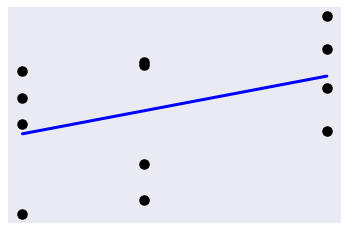

In [76]:
# run linear regression on JHH7 values

# X values are concentration
JHH7_X = JHH7_concentrations_df['concentration'].to_numpy()
JHH7_X = JHH7_X.reshape(-1, 1)
# Y is mean speed
JHH7_Y = JHH7_concentrations_df['mean_track_speed'].to_numpy()
JHH7_Y = JHH7_Y.reshape(-1, 1)


regr = linear_model.LinearRegression()
regr.fit(JHH7_X, JHH7_Y)

JHH7_y_pred = regr.predict(JHH7_X)

# The coefficients
coefficient = regr.coef_[0][0]
print("Coefficients: \n", coefficient)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(JHH7_Y, JHH7_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(JHH7_Y, JHH7_y_pred))

print(regr.get_params())

# Plot outputs
plt.scatter(JHH7_X, JHH7_Y, color="black")
plt.plot(JHH7_X, JHH7_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [92]:
X2 = sma.add_constant(JHH7_X)

model = sma.OLS(JHH7_Y, X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     1.950
Date:                Thu, 10 Feb 2022   Prob (F-statistic):              0.193
Time:                        16:20:17   Log-Likelihood:                -7.7600
No. Observations:                  12   AIC:                             19.52
Df Residuals:                      10   BIC:                             20.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3301      0.221     19.589      0.0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


[Text(0.5, 1.0, 'JHH6 Mean Track Speeds vs. Concentration of MK2206')]

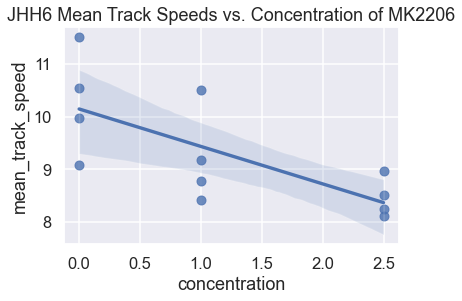

In [71]:
sns.regplot(data=JHH6_concentrations_df, x="concentration", 
            y="mean_track_speed").set(title='JHH6 Mean Track Speeds vs. Concentration of MK2206')

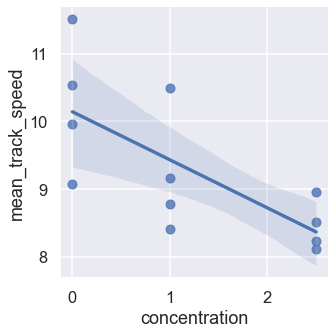

In [72]:
sns.lmplot(data=JHH6_concentrations_df, x="concentration", 
            y="mean_track_speed")

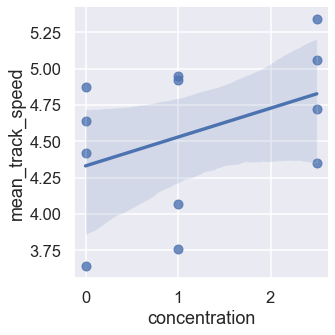

In [73]:
sns.lmplot(data=JHH7_concentrations_df, x="concentration", 
            y="mean_track_speed")

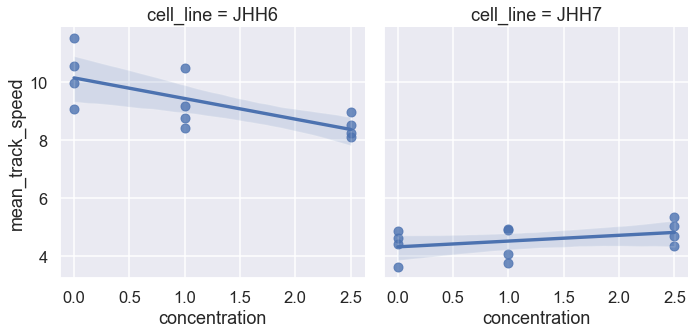

In [74]:
sns.lmplot(data=concentrations_df, x="concentration", 
            y="mean_track_speed", col="cell_line")